In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from collections import Counter
import tqdm
import jieba

In [2]:
# 2018-03-03号的乘客评价司机的数据（评价长度大于20）
data = pd.read_csv('demo.txt', encoding='utf-8', sep="\t")

In [3]:
data.shape

(7117, 3)

In [4]:
data.head()

order_id                                      rate_detail rate_num
0  5.770000e+17                      不走高速，多坐了一个多小时的路程，一次很不愉快的旅程！        1
1  5.770000e+17                            开车稳稳得！新车第一次做啊。期待下次合作！        3
2  5.770000e+17                       师傅人真的超好！非常有礼貌，也很健谈！期待再次同行！        3
3  5.770000e+17         超载加超车，加绕路，真是醉了，脾气也不好，不敢坐了，好怕怕，拐进村子里，黑漆漆的        1
4  5.770000e+17  帮亲戚叫的车，几十块钱电话打几个来吹，都说了忙完了马上确认，要是有时间我不会自己送还打什么车？        1

In [5]:
# 处理数据长度，只选取数据长度大于20的
data['lens'] = data['rate_detail'].apply(lambda x:x.strip()).apply(lambda x:len(x))
data = data[data['lens']>=20]
data.shape

In [8]:
pos = data[data['rate_num']=='3'][['rate_detail']]
pos.reset_index(inplace=True, drop=True)
neg = data[data['rate_num']!='3'][['rate_detail']]
neg.reset_index(inplace=True, drop=True)

In [9]:
pos.shape, neg.shape

((3226, 1), (3884, 1))

In [10]:
pos.head()

rate_detail
0                        开车稳稳得！新车第一次做啊。期待下次合作！
1                   师傅人真的超好！非常有礼貌，也很健谈！期待再次同行！
2                        感谢，感谢，又送了我一段路程，期待下次相遇
3  谁坐谁赚到哇！小哥哥不仅帅人也超好！ps.钟经理给了好座位还送小吃！谢谢谢谢谢谢谢啦！
4        提前到了，还愿意等，因为要做肩颈理疗所以拖迟了一会，师傅非常耐心等着，很棒

In [11]:
neg.head()

rate_detail
0                        不走高速，多坐了一个多小时的路程，一次很不愉快的旅程！
1           超载加超车，加绕路，真是醉了，脾气也不好，不敢坐了，好怕怕，拐进村子里，黑漆漆的
2    帮亲戚叫的车，几十块钱电话打几个来吹，都说了忙完了马上确认，要是有时间我不会自己送还打什么车？
3  没有在定位处等待，直接开走了，然后打电话给我说没看到我人就开走了，让他开回来很不情愿，上车后...
4  未到达目的地 想让我下车自己走过去 还有一大段路 我没有妥协！一个小女生拿着28寸的大行李箱...

In [12]:
pos.to_csv('pos.txt', index=False, header=False)
neg.to_csv('neg.txt', index=False, header=False)
# 保存正负样本数据

In [147]:
# 加载停用词
with open ('stopwords.txt', 'r') as f:
    stopwords = f.read()
f.close()
stopwords = stopwords.split("\n")
len(stopwords), stopwords[:10]

(1018, ['$', '0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [17]:
# 定义读函数，读入文本文件，并分词
def read(file):
    pos_sentence = []
    with open (file, 'r') as f:
        pos_text = f.read()
    pos_s = pos_text.split("\n")
    for s in pos_s:
        a = jieba.cut(s)
        temp = []
        for i in a:
            if i not in stopwords:# 判断是否是停用词
                 temp.append(i.strip())
        pos_sentence.append(' '.join(temp))
    return '\n'.join(pos_sentence)


In [19]:
# 加载正/负评论数据
pos_words = read('pos.txt')
neg_words = read('neg.txt')

In [26]:
pos_words

'开车 稳稳 新车 第一次 做 期待 下次 合作\n师傅 真的 超好 非常 礼貌 健谈 期待 再次 同行\n感谢 感谢 送 一段 路程 期待 下次 相遇\n坐 赚 哥哥 帅人 超好 ps 钟 经理 座位 送 小吃 谢谢 谢谢 谢谢 谢\n提前 愿意 做 肩颈 理疗 拖迟 一会 师傅 非常 耐心 很棒\n司机 差 几分钟 不能 拼车 司机 接 单\n师傅 非常 老人 钱包 落 车上 师傅 特意 送 过去 拾金不昧 大大的 赞\n今晚 居然 拼车 成功 省 10 几蚊 元宵节 快乐\n司机 热情 聊天 东西 落 车上 热心 帮 送 回来 非常感谢 t ︶ ` s\n师傅 超级 好久 木有 脾气 礼貌 健谈\n车 主人 超级 将近 10 分钟 提醒 我出 站 厅 很多 电动车 小心 点 注意安全 觉得 很暖心 谢谢 期待 下次 继续 打到 车\n哥哥 我加 微信 是不是 不要 钱 看到 快加 微信 微信 加不上\n朋友 说 聊 一路 旁听者 感觉 司机 和蔼可亲 可爱 好人\n非常 东西 很多 师傅 帮忙 搬 尽量 腾出 更 空间 放 箱子\n车牌 666 车 主人 666 期待 下次 同行 感谢 送到 家\n非常 棒 手机 没 电 师傅 耐心 等待 露宿 火车站\n哥哥 特别 本来 不用 送 进 学校 主动 送 进去 人超 期待 再次 同行\n不错 车主 第一次 做 宝马 顺风 车 有缘\n飞机 晚点 感谢 师傅 久 车技 期待 再次 同行\n谢谢 顺风 车 老大 哥哥 热情周到 准时到达 目的地 一个 好心肠 老大哥 感谢 一路上 陪伴 希望 下次 机会 相遇\n期待 下次 同行 车 主人 帅哥 一枚\n车主 人帅帅 一路 只顾 打游戏 没 聊天 主动 找人 聊天 全 分\n姐姐 nice 性格 一路上 愉快\n师傅 客气 热情 服务 期待 下次 同行\n一路 畅聊 中途 逛 高速公路 开天窗 感受 一路 暖风 咨询 买车 细节 有问必答 特别 友善 可爱\n司机 服务 周到 准时 下次 一定 找\n师傅 一百个 五星 好评 师傅 心态 太 年轻 特别 幽默 太 好玩 赞\n司机 师傅 下次 机会 希望 坐 一次\n弟弟 车 孩子 走 磨蹭 迟到 好几分钟 车主 半天 实在 不好意思 谢谢 车主 耐心\n五个 赞 态度 超级 棒 神 准时 驾驶 平稳 不失 速度 希望

In [28]:
neg_words

'走 高速 坐 一个多 小时 路程 一次 愉快 旅程\n超载 加 超车 加 绕路 真是 醉 脾气 不好 不敢 坐 怕怕 拐进 村子 里 黑漆漆\n帮 亲戚 车 几十块 钱 电话 几个 吹 说 忙 完 马上 确认 时间 不会 送还 车\n没有 定位 处 等待 直接 开走 打电话 说 没 看到 我人 开走 开 回来 情愿 上车 一直 说 责任 骂 说 顺风 车 过来 接 已经 不错 争辩 直接 下车 外面 大雨 没有 伞\n未 到达 目的地 想 下车 走 过去 一大 段路 没有 妥协 一个 小女生 28 寸 行李箱 下来 帮帮忙\n坦诚 告诉 乘客 想法 尊重 心态 沟通\n车牌 符合 坐 舒服 省 10 多块 高速 费 半个 钟 车程 硬 走 一个半 钟\n太 年轻 一年 驾龄 高速 昌河 面包 时速 120\n逆行 人生 第一次 搭车 逆行 提醒 知道\n开 慢 迟到 二十分钟 打个 电话 说声\n迟到 严重 10 分钟 特别 讨人厌 好不好\n多个 软件 拼车 接单 实际 拼车 确 未 拼车 成功 支付 金额\n车 有人 服务态度 欠佳 带 嘲笑 语气\n优享 车 开 一辆车 根本 配不上 优享 钱\n害 迟到 扣 一百 75 公里 跑 四个 小时 赶时间 最早 上车 蓬江区 差不多 距离 送 最迟 上车 先回\n素质 太 差 做 快车 顺风 车 带绕 小大圈 嘴巴 太老\n赚 几十块 钱 害 受罪 自私自利 钱 不择手段\n距离 两分钟 围绕 我开 半个 小时 接到 多次 压 道路 分隔线 行驶 多次 闯红灯 开车 状态 极其 不好 人身安全 极其 不负责任 感觉 喝酒 精神 不好\n司机 差劲 收钱 骗人 拼 四个 人用 两个 手机 真的 差劲 严重 投诉 司机 开车 五点 半 七点 出发 没见 差劲 希望 滴滴 公司 好好 整合 一下\n司机 大哥 真的 火车 延迟 好久 疯狂 call\n司机 超 好人 元宵 肯载 买 汤圆 礼貌 准时\n车里 臭 抹布 味儿 开车 贼 慢贼 肉 坐 令人 烦躁\n明明 带 拼车 乘客 未 走 平台 多收 钱\n感觉 快 晕车 一会 来个 刹车 过会\n走 错路位 送到 终点 车内 全是 酒气 私下 拼 一个\n态度 不好 脑子 有病 话 说 利落 一脚 急刹车 没到 指定 位置 接\n拼车 拼 晚 四十五分钟 没 看见 

In [39]:
# 查看词频
total_text = pos_words +'\n' + neg_words
total_text = total_text.split()
c = Counter(total_text)
# 倒序查看词频
counts = sorted(c.most_common(), key=lambda x: x[1], reverse=True)
counts[:20]

[('司机', 2081),
 ('车', 1546),
 ('师傅', 1269),
 ('说', 1002),
 ('非常', 997),
 ('小时', 787),
 ('拼车', 785),
 ('一个', 767),
 ('走', 714),
 ('下次', 696),
 ('坐', 670),
 ('没', 579),
 ('没有', 574),
 ('乘客', 571),
 ('车主', 567),
 ('特别', 566),
 ('开车', 563),
 ('期待', 511),
 ('送到', 504),
 ('态度', 499)]

### 构造词典

In [40]:
# 初始化两个token：pad和unk
vocab = ["<pad>", "<unk>"]

# 去除出现频次为1次的单词
for w, f in c.most_common():
    if f > 1:
        vocab.append(w)

### 构造映射

In [42]:
len(vocab)

4428

In [43]:
# 单词到编码的映射，例如'司机': 2
word_to_token = {word: token for token, word in enumerate(vocab)}
# 编码到单词的映射，例如 2:'司机'
token_to_word = {token: word for word, token in word_to_token.items()}

In [47]:
# 分句
pos_sentences = pos_words.split('\n')
neg_sentences = neg_words.split('\n')

### 转换句子中的单词为tokens

In [66]:
SENTENCE_LIMIT_SIZE = 200
def convert_text_to_token(sentence, word_to_token_map=word_to_token, limit_size=SENTENCE_LIMIT_SIZE):
    """
    根据单词-编码映射表将单个句子转化为token
    
    @param sentence: 句子，str类型
    @param word_to_token_map: 单词到编码的映射
    @param limit_size: 句子最大长度。超过该长度的句子进行截断，不足的句子进行pad补全
    
    return: 句子转换为token后的列表
    """
    # 获取unknown单词和pad的token
    unk_id = word_to_token_map["<unk>"]
    pad_id = word_to_token_map["<pad>"]
    
    # 对句子进行token转换，对于未在词典中出现过的词用unk的token填充
    tokens = [word_to_token_map.get(word, unk_id) for word in sentence.lower().split()]
    
    # Pad
    if len(tokens) < limit_size:
        tokens.extend([0] * (limit_size - len(tokens)))
    # Trunc
    else:
        tokens = tokens[:limit_size]
    
    return tokens 


In [148]:
# 处理文本数据;
def convert_token(oriList):
    destList = []
    for sentence in tqdm.tqdm(oriList):
        tokens = convert_text_to_token(sentence)
        destList.append(tokens)
    return destList

# 对pos文本处理
pos_tokens = convert_token(pos_sentences)
# 对neg文本处理
neg_tokens = convert_token(neg_sentences)

100%|██████████| 3885/3885 [00:00<00:00, 34718.84it/s]


In [69]:
# 转化为numpy格式，方便处理
pos_tokens = np.array(pos_tokens)
neg_tokens = np.array(neg_tokens)

In [70]:
# 合并所有语料
total_tokens = np.concatenate((pos_tokens, neg_tokens), axis=0)

In [71]:
print("The shape of all tokens in our corpus: ({}, {})".format(*total_tokens.shape))

The shape of all tokens in our corpus: (7112, 200)


In [72]:
# 转化为numpy格式，方便处理
pos_targets = np.ones((pos_tokens.shape[0]))
neg_targets = np.zeros((neg_tokens.shape[0]))

In [73]:
# 合并所有target
total_targets = np.concatenate((pos_targets, neg_targets), axis=0).reshape(-1, 1)
print("The shape of all targets in our corpus: ({}, {})".format(*total_targets.shape))

The shape of all targets in our corpus: (7112, 1)


In [79]:
# 加载预训练好的词向量
with open("./result/zh_cars_split_cbow_ng_win5_min1_size300_vector.txt", 'r') as f:
    words = set()
    word_to_vec = {}
    for line in f:
        line = line.strip().split()
        # 当前单词
        curr_word = line[0]
        words.add(curr_word)
        # 当前词向量
        word_to_vec[curr_word] = np.array(line[1:], dtype=np.float32)

In [80]:
VOCAB_SIZE = len(vocab) 
EMBEDDING_SIZE = 300
print(VOCAB_SIZE)

40115


In [81]:
print("The number of words which have pretrained-vectors in vocab is: {}".format(len(set(vocab)&set(words))))
print("The number of words which do not have pretrained-vectors in vocab is : {}".format(len(set(vocab))-
                                                                                         len(set(vocab)&set(words))))

The number of words which have pretrained-vectors in vocab is: 40115

The number of words which do not have pretrained-vectors in vocab is : 0


In [82]:
# 初始化词向量矩阵（这里命名为static是因为这个词向量矩阵用预训练好的填充，无需重新训练）
static_embeddings = np.zeros([VOCAB_SIZE, EMBEDDING_SIZE])

for word, token in tqdm.tqdm(word_to_token.items()):
    # 用glove词向量填充，如果没有对应的词向量，则用随机数填充
    word_vector = word_to_vec.get(word, 0.2 * np.random.random(EMBEDDING_SIZE) - 0.1)
    static_embeddings[token, :] = word_vector

# 重置PAD为0向量
pad_id = word_to_token["<pad>"]
static_embeddings[pad_id, :] = np.zeros(EMBEDDING_SIZE)

100%|██████████| 4428/4428 [00:00<00:00, 35653.31it/s]


In [83]:
static_embeddings = static_embeddings.astype(np.float32)

# 建立模型

### 辅助函数

In [84]:
# 分割train和test
def split_train_test(x, y, train_ratio=0.8, shuffle=True):
    """
    分割train和test
    
    @param x: 输入特征
    @param y: 目标
    @param train_ratio: 训练样本比例
    @param shuffle: 是否shuffle
    """
    assert x.shape[0] == y.shape[0],  print("error shape!")
    
    if shuffle:
        # shuffle
        shuffled_index = np.random.permutation(range(x.shape[0]))
        x = x[shuffled_index]
        y = y[shuffled_index]
    
    # 分离train和test
    train_size = int(x.shape[0] * train_ratio)
    x_train = x[:train_size]
    x_test = x[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]
    
    return x_train, x_test, y_train, y_test

In [85]:
# 划分train和test
x_train, x_test, y_train, y_test = split_train_test(total_tokens, total_targets)

### get_batch函数

In [92]:
BATCH_SIZE = 256
def get_batch(x, y, batch_size=BATCH_SIZE, shuffle=True):
    assert x.shape[0] == y.shape[0], print("error shape!")
    # shuffle
    if shuffle:
        shuffled_index = np.random.permutation(range(x.shape[0]))

        x = x[shuffled_index]
        y = y[shuffled_index]
    
    # 统计共几个完整的batch
    n_batches = int(x.shape[0] / batch_size)
    
    for i in range(n_batches - 1):
        x_batch = x[i*batch_size: (i+1)*batch_size]
        y_batch = y[i*batch_size: (i+1)*batch_size]
    
        yield x_batch, y_batch

## 1、DNN

In [88]:
# 清空图
tf.reset_default_graph()
# 定义模型
#清空图
tf.reset_default_graph()

HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
EPOCHES = 50
BATCH_SIZE = 256

with tf.name_scope("dnn"):
    # 输入及输出tensor
    with tf.name_scope("placeholder"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')

    # embedding
    with tf.name_scope("embedding"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embeding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        # 相加词向量得到句子向量
        sum_embed = tf.reduce_sum(embed, axis=1, name='sum_embed')

    # model
    with tf.name_scope('model'):
        # 隐含层权重
        W1 = tf.Variable(tf.random_normal(shape=(EMBEDDING_SIZE,HIDDEN_SIZE)), name="W1")
        b1 = tf.Variable(tf.zeros(shape=(HIDDEN_SIZE), name="b1"))

        # 输出层权重?
        W2 = tf.Variable(tf.random_normal(shape=(HIDDEN_SIZE, 1), stddev=0.1), name='W2')
        b2 = tf.Variable(tf.zeros(shape=(1), name='b2'))

        # 结果
        z1 = tf.add(tf.matmul(sum_embed, W1), b1)
        a1 = tf.nn.relu(z1)

        logits = tf.add(tf.matmul(a1, W2), b2)
        outputs = tf.nn.sigmoid(logits, name='outputs')

    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))

    # optimizer?
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

    # evaluation
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))


In [137]:
##训练模型
dnn_train_accuracy = []
dnn_test_accuracy = []

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/dnn_', tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)

    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], feed_dict={inputs: x_batch, targets: y_batch})
            total_loss += batch_loss

        # 在训练集上的准确度
        train_corrects = sess.run(accuracy, feed_dict={inputs:x_train, targets:y_train})
        train_acc = train_corrects / x_train.shape[0]
        dnn_train_accuracy.append(train_acc)

        # 在test上准确率
        test_corrects = sess.run(accuracy, feed_dict={inputs:x_test, targets:y_test})
        test_acc = test_corrects / x_test.shape[0]
        dnn_test_accuracy.append(test_acc)

        print("Epoch:{}, Trainloss:{:.4f}, Trainaccuracy:{:.4f}, Testaccuracy:{:.4f}".format(
            epoch+1, total_loss/n_batches, train_acc, test_acc
        ))

    saver.save(sess, "./checkpoints/dnn")
    writer.close()


Epoch:1, Trainloss:25.0147, Trainaccuracy:0.7898, Testaccuracy:0.7737
Epoch:2, Trainloss:14.8517, Trainaccuracy:0.8086, Testaccuracy:0.8011
Epoch:3, Trainloss:13.1118, Trainaccuracy:0.8142, Testaccuracy:0.7976
Epoch:4, Trainloss:12.8219, Trainaccuracy:0.8123, Testaccuracy:0.8082
Epoch:5, Trainloss:11.7211, Trainaccuracy:0.8202, Testaccuracy:0.8060
Epoch:6, Trainloss:10.4778, Trainaccuracy:0.8200, Testaccuracy:0.8159
Epoch:7, Trainloss:9.0286, Trainaccuracy:0.8149, Testaccuracy:0.8018
Epoch:8, Trainloss:7.9244, Trainaccuracy:0.8158, Testaccuracy:0.7934
Epoch:9, Trainloss:7.8533, Trainaccuracy:0.8051, Testaccuracy:0.8131
Epoch:10, Trainloss:7.1140, Trainaccuracy:0.8265, Testaccuracy:0.7997
Epoch:11, Trainloss:6.7666, Trainaccuracy:0.8235, Testaccuracy:0.8074
Epoch:12, Trainloss:6.1382, Trainaccuracy:0.8244, Testaccuracy:0.8173
Epoch:13, Trainloss:5.5794, Trainaccuracy:0.8188, Testaccuracy:0.8110
Epoch:14, Trainloss:5.2431, Trainaccuracy:0.8212, Testaccuracy:0.8173
Epoch:15, Trainloss:4.7

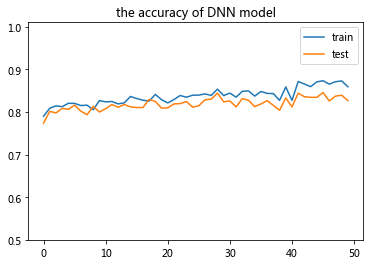

In [138]:
plt.plot(dnn_train_accuracy)
plt.plot(dnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('the accuracy of DNN model')
plt.legend(["train", 'test'])
plt.savefig('DNN_model.png')

In [139]:
##预测模型
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/dnn")
    evalueate(x_train, y_train,'train')
    evalueate(x_test, y_test,'test')
    

INFO:tensorflow:Restoring parameters from checkpoints/dnn
model accuracy on train set:86.17%
model accuracy on test set:81.87%


## 1-1DNN+dropout

Epoch:1, Trainloss:19.1787, Trainaccuracy:0.8066, Testaccuracy:0.8110
Epoch:2, Trainloss:13.9631, Trainaccuracy:0.8102, Testaccuracy:0.8089
Epoch:3, Trainloss:11.6925, Trainaccuracy:0.8089, Testaccuracy:0.7997
Epoch:4, Trainloss:11.0130, Trainaccuracy:0.8109, Testaccuracy:0.7955
Epoch:5, Trainloss:9.4301, Trainaccuracy:0.8191, Testaccuracy:0.7962
Epoch:6, Trainloss:9.3337, Trainaccuracy:0.8205, Testaccuracy:0.8060
Epoch:7, Trainloss:8.1443, Trainaccuracy:0.8204, Testaccuracy:0.8103
Epoch:8, Trainloss:7.2420, Trainaccuracy:0.8033, Testaccuracy:0.8039
Epoch:9, Trainloss:6.5637, Trainaccuracy:0.8175, Testaccuracy:0.8053
Epoch:10, Trainloss:6.3150, Trainaccuracy:0.8128, Testaccuracy:0.8060
Epoch:11, Trainloss:5.6018, Trainaccuracy:0.8200, Testaccuracy:0.8117
Epoch:12, Trainloss:5.0574, Trainaccuracy:0.8321, Testaccuracy:0.8046
Epoch:13, Trainloss:4.3213, Trainaccuracy:0.8144, Testaccuracy:0.8082
Epoch:14, Trainloss:4.0235, Trainaccuracy:0.8290, Testaccuracy:0.8124
Epoch:15, Trainloss:3.754

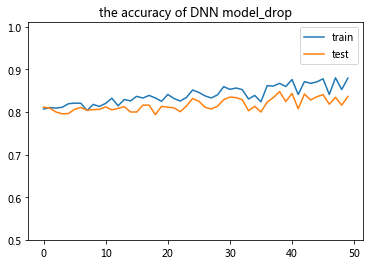

In [129]:
#清空图
tf.reset_default_graph()

HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
EPOCHES = 50
BATCH_SIZE = 256

with tf.name_scope("dnn"):
    # 输入及输出tensor
    with tf.name_scope("placeholder"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')

    # embedding
    with tf.name_scope("embedding"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embeding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        # 相加词向量得到句子向量
        sum_embed = tf.reduce_sum(embed, axis=1, name='sum_embed')

    # model
    with tf.name_scope('model'):
        # 隐含层权重
        W1 = tf.Variable(tf.random_normal(shape=(EMBEDDING_SIZE,HIDDEN_SIZE)), name="W1")
        b1 = tf.Variable(tf.zeros(shape=(HIDDEN_SIZE), name="b1"))

        # 输出层权重?
        W2 = tf.Variable(tf.random_normal(shape=(HIDDEN_SIZE, 1), stddev=0.1), name='W2')
        b2 = tf.Variable(tf.zeros(shape=(1), name='b2'))

        # 结果
        z1 = tf.add(tf.matmul(sum_embed, W1), b1)
        a1 = tf.nn.relu(z1)
        a1_drop = tf.nn.dropout(a1, keep_prob=0.5)

        logits = tf.add(tf.matmul(a1_drop, W2), b2)
        outputs = tf.nn.sigmoid(logits, name='outputs')

    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))

    # optimizer?
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

    # evaluation
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))


##训练模型
dnn_train_accuracy = []
dnn_test_accuracy = []

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/dnn_drop', tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)

    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], feed_dict={inputs: x_batch, targets: y_batch})
            total_loss += batch_loss

        # 在训练集上的准确度
        train_corrects = sess.run(accuracy, feed_dict={inputs:x_train, targets:y_train})
        train_acc = train_corrects / x_train.shape[0]
        dnn_train_accuracy.append(train_acc)

        # 在test上准确率
        test_corrects = sess.run(accuracy, feed_dict={inputs:x_test, targets:y_test})
        test_acc = test_corrects / x_test.shape[0]
        dnn_test_accuracy.append(test_acc)

        print("Epoch:{}, Trainloss:{:.4f}, Trainaccuracy:{:.4f}, Testaccuracy:{:.4f}".format(
            epoch+1, total_loss/n_batches, train_acc, test_acc
        ))

    saver.save(sess, "./checkpoints/dnn_drop")
    writer.close()

plt.plot(dnn_train_accuracy)
plt.plot(dnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('the accuracy of DNN model_drop')
plt.legend(["train", 'test'])
plt.savefig('DNN_model_drop.png')


In [136]:
##预测模型
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/dnn_drop")
    evalueate(x_train, y_train,'train')
    evalueate(x_test, y_test,'test')
    

INFO:tensorflow:Restoring parameters from checkpoints/dnn_drop
model accuracy on train set:88.01%
model accuracy on test set:84.68%


## 2、CNN

In [98]:
#清空图
tf.reset_default_graph()


# HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
EPOCHES = 50
BATCH_SIZE = 256
L2_LAMBDA = 10
KEEP_PROB = 0.8
# 5种filter，每种100个
filters_size = [2,3,4,5,6]
num_filters = 100

with tf.name_scope("cnn"):
    # 输入及输出tensor
    with tf.name_scope("placeholder"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='targets')

    # embedding
    with tf.name_scope("embedding"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embeding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name='embed')
        # 添加channel维度
        embed_expanded = tf.expand_dims(embed, -1, name="embed_expand")

    # 用来存储max-pooling的结果
    pooled_outputs = []

    # 迭代多个filter
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope("conv_maxpool_%s" % filter_size):
            filter_shape = [filter_size, EMBEDDING_SIZE, 1, num_filters]
            # 输出层权重?
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name='W')
            b = tf.Variable(tf.zeros(num_filters), name='b')

            conv = tf.nn.conv2d(input=embed_expanded,
                                filter=W,
                                strides=[1,1,1,1],
                                padding="VALID",
                                name='conv')
            # 激活
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name='activations')

            # 池化
            max_pooling = tf.nn.max_pool(value=a,
                                         ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                         strides=[1, 1, 1, 1],
                                         padding="VALID",
                                         name="max_pooling")
            pooled_outputs.append(max_pooling)

    # 统计所有的filter
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))

    # dropout                ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1,1],
    #                                          strides=[1,1,1,1],
    #                                          padding="VALID",
    #                                          name
    with tf.name_scope("dropout"):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)

    # output
    with tf.name_scope('output'):
        W = tf.get_variable('W', shape=(total_filters, 1), initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name="b")

        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name="predictions")

    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)

    # optimizer
    with tf.name_scope('optimizer'):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

    # evaluation
    with tf.name_scope('evaluation'):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))




In [108]:

##训练模型
cnn_train_accuracy = []
cnn_test_accuracy = []

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/cnn_', tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)

    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train, y_train):
            _, batch_loss = sess.run([optimizer, loss], feed_dict={inputs: x_batch, targets: y_batch})
            total_loss += batch_loss

        # 在训练集上的准确度
        train_corrects = sess.run(accuracy, feed_dict={inputs:x_train, targets:y_train})
        train_acc = train_corrects / x_train.shape[0]
        cnn_train_accuracy.append(train_acc)

        # 在验证集上准确率
        test_corrects = sess.run(accuracy, feed_dict={inputs:x_test, targets:y_test})
        test_acc = test_corrects / x_test.shape[0]
        cnn_test_accuracy.append(test_acc)

        print("Epoch:{}, Trainloss:{:.4f}, Trainaccuracy:{:.4f}, Testaccuracy:{:.4f}".format(
            epoch+1, total_loss/n_batches, train_acc, test_acc
        ))

    saver.save(sess, "checkpoints/cnn")
    writer.close()


Epoch:1, Trainloss:37.7680, Trainaccuracy:0.7548, Testaccuracy:0.7667
Epoch:2, Trainloss:13.8575, Trainaccuracy:0.8130, Testaccuracy:0.8096
Epoch:3, Trainloss:11.7931, Trainaccuracy:0.8198, Testaccuracy:0.8173
Epoch:4, Trainloss:11.3987, Trainaccuracy:0.8170, Testaccuracy:0.8082
Epoch:5, Trainloss:10.7356, Trainaccuracy:0.8107, Testaccuracy:0.8110
Epoch:6, Trainloss:10.2983, Trainaccuracy:0.8105, Testaccuracy:0.8180
Epoch:7, Trainloss:9.3209, Trainaccuracy:0.8221, Testaccuracy:0.8067
Epoch:8, Trainloss:8.9208, Trainaccuracy:0.8195, Testaccuracy:0.8060
Epoch:9, Trainloss:8.2343, Trainaccuracy:0.8288, Testaccuracy:0.8180
Epoch:10, Trainloss:7.9533, Trainaccuracy:0.8344, Testaccuracy:0.8025
Epoch:11, Trainloss:7.6506, Trainaccuracy:0.8306, Testaccuracy:0.8320
Epoch:12, Trainloss:6.7822, Trainaccuracy:0.8298, Testaccuracy:0.8208
Epoch:13, Trainloss:6.6371, Trainaccuracy:0.8255, Testaccuracy:0.8201
Epoch:14, Trainloss:6.4036, Trainaccuracy:0.8140, Testaccuracy:0.8053
Epoch:15, Trainloss:5.9

INFO:tensorflow:Restoring parameters from checkpoints/cnn
dnn model accuracy on test set:83.70%


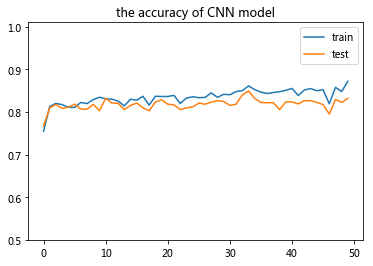

In [109]:
plt.plot(cnn_train_accuracy)
plt.plot(cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title('the accuracy of CNN model')
plt.legend(["train", 'test'])
plt.savefig('CNN_model.png')

##预测模型
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")

    total_correct = 0
    acc = sess.run(accuracy, feed_dict={inputs:x_test, targets:y_test})
    total_correct += acc
    print("dnn model accuracy on test set:{:.2f}%".format(
        100*total_correct / x_test.shape[0]
    ))

In [140]:
##预测模型
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")

##预测模型
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")
    evalueate(x_train, y_train,'train')
    evalueate(x_test, y_test,'test')
    

INFO:tensorflow:Restoring parameters from checkpoints/cnn
INFO:tensorflow:Restoring parameters from checkpoints/cnn
model accuracy on train set:86.18%
model accuracy on test set:84.05%
